## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
# Load data
df = pd.read_csv('ABBV-AbbVie.csv')

## Data preprocessing

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,79.769997,80.849998,79.279999,80.099998,62.999912,8567900
2019-03-04,80.400002,80.730003,79.110001,79.459999,62.496529,5872500
2019-03-05,79.379997,79.900002,78.720001,78.910004,62.063969,5933100
2019-03-06,79.129997,79.129997,77.559998,78.089996,61.419025,5293200
2019-03-07,77.769997,79.120003,77.440002,78.239998,61.537003,6642500
...,...,...,...,...,...,...
2024-02-23,177.259995,178.910004,177.009995,178.089996,176.442200,3941800
2024-02-26,178.839996,179.789993,178.000000,178.809998,177.155533,4327400
2024-02-27,178.770004,179.529999,176.979996,178.990005,177.333878,3888500


## Scale Data

In [4]:
# Select 'Close' column
data = df['Close'].values

In [5]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

## Split the data into train and test

In [6]:
# Define the size of train and test
train_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - train_size

# Split the data into train and test set
train_data = data_scaled[0 : train_size, :]
test_data = data_scaled[train_size : len(data_scaled), :]

## Create and add data into X, y

In [7]:
def add_data(data, sequence_length=1):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : (i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [8]:
# Reshape into X=t,t+1,t+2..t+60 and Y=t+60
sequence_length = 60

# Get last data for test
train_last_windowsize = train_data[-sequence_length:]

test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Build Model

In [9]:
model = Sequential() # Encapsulate the sequence of the inner layers

# 4 LSTM layers
model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# 1 Dense layer
model.add(Dense(units=1)) 

# Optimizer
model.compile(optimizer = 'adam', loss='mean_squared_error')

D:\Anaconda\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training Model

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
26/26 - 14s - 534ms/step - loss: 0.0335
Epoch 2/50
26/26 - 2s - 83ms/step - loss: 0.0070
Epoch 3/50
26/26 - 2s - 81ms/step - loss: 0.0046
Epoch 4/50
26/26 - 2s - 92ms/step - loss: 0.0043
Epoch 5/50
26/26 - 2s - 95ms/step - loss: 0.0039
Epoch 6/50
26/26 - 3s - 99ms/step - loss: 0.0042
Epoch 7/50
26/26 - 3s - 103ms/step - loss: 0.0045
Epoch 8/50
26/26 - 3s - 98ms/step - loss: 0.0040
Epoch 9/50
26/26 - 3s - 112ms/step - loss: 0.0039
Epoch 10/50
26/26 - 3s - 96ms/step - loss: 0.0036
Epoch 11/50
26/26 - 2s - 96ms/step - loss: 0.0041
Epoch 12/50
26/26 - 2s - 93ms/step - loss: 0.0032
Epoch 13/50
26/26 - 3s - 107ms/step - loss: 0.0035
Epoch 14/50
26/26 - 2s - 95ms/step - loss: 0.0035
Epoch 15/50
26/26 - 2s - 93ms/step - loss: 0.0036
Epoch 16/50
26/26 - 2s - 77ms/step - loss: 0.0029
Epoch 17/50
26/26 - 2s - 86ms/step - loss: 0.0034
Epoch 18/50
26/26 - 2s - 87ms/step - loss: 0.0031
Epoch 19/50
26/26 - 2s - 87ms/step - loss: 0.0028
Epoch 20/50
26/26 - 2s - 79ms/step - loss: 0.0037
Epoc

## Predict and Inverse Transform the Predictions

In [11]:
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step


## Calculate the error of the model

In [12]:
# The error in test set
test_mape = mean_absolute_percentage_error(y_pred, y_test)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: ", test_mape)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAPE on Test set:  0.03973712561690949
RMSE on Test set:  6.748925244478782
MSLE on Test set:  0.0019400130528528623


## Predict Close price for 90 next days

In [13]:
# Select the last day of current index
last_date = df.index[-1]

# Add a new day after the last day
next_date = last_date + pd.DateOffset(days=1)

# Generate a list of index only starting from the next day in 90 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

# Predict Close price for 90 next days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, -1, 1)

y_next_90_days = []

for i in range(90):
    # Predict Close price for next day
    next_day_pred = model.predict(last_sequence_days)
    
    # Save the predict value
    y_next_90_days.append(next_day_pred[0][0])
    
    # Update information of the next day
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [14]:
# Show the result of predict 90 next days 
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1))
print(y_next_90_days.flatten())

[167.47707  167.17365  166.20374  164.69966  162.87982  160.94925
 159.05565  157.2843   155.6713   154.22134  152.92319  151.75938
 150.7118   149.76358  148.89949  148.10556  147.36911  146.67809
 146.0217   145.39018  144.77515  144.16962  143.56812  142.96657
 142.36215  141.7532   141.13904  140.51978  139.89609  139.2691
 138.64029  138.01123  137.38356  136.75896  136.1389   135.52484
 134.91791  134.31914  133.72925  133.14885  132.57831  132.01778
 131.46727  130.9267   130.39583  129.87436  129.3619   128.85803
 128.3624   127.87449  127.39386  126.92013  126.4529   125.99183
 125.5366   125.08691  124.6425   124.20319  123.76875  123.339096
 122.91405  122.493576 122.077545 121.66591  121.258606 120.855606
 120.456856 120.06233  119.672    119.285805 118.90376  118.52583
 118.15194  117.782074 117.4162   117.05427  116.69622  116.342026
 115.99164  115.64499  115.30206  114.962776 114.6271   114.294975
 113.966354 113.641205 113.31946  113.001076 112.686035 112.374275]


## Model visualization

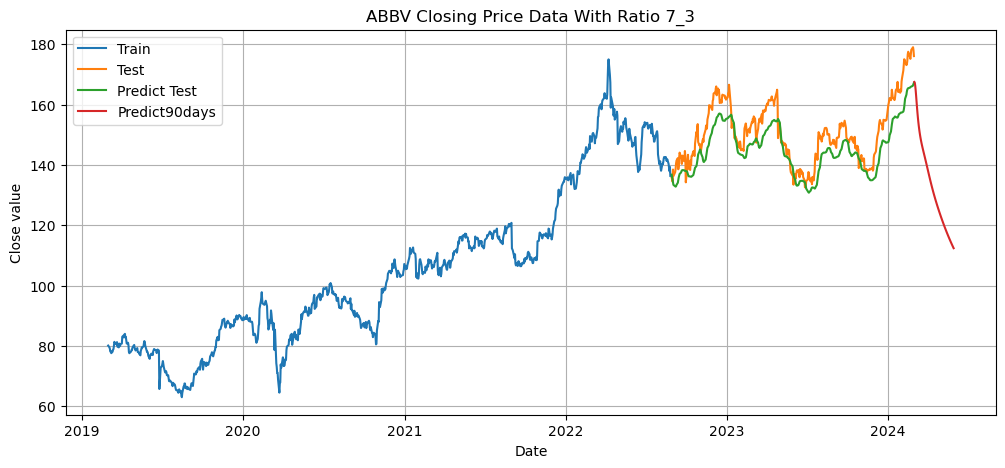

In [15]:
plt.figure(figsize=(12, 5))

# Train set
plt.plot(df[:train_size].index, train_data)

# Test set
plt.plot(df[train_size:].index, test_data)

# Predict in test set
plt.plot(df[train_size:].index, y_pred)

# Predict 90 next days
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict Test', 'Predict90days'])
plt.grid()
plt.title("ABBV Closing Price Data With Ratio 7_3")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('Image/RNN_73_90days_ABBV.png')
plt.show()